# Lab 4: Find Wally

In this exercise we are going to play the "Find wally" game.

- **Inputs**:
  You have 2 images, one with the Wally's profile, and another with the puzzle, were we should find Wally.

- **Expected result**:
  Visual location of Wally in the provided puzzle.

## Requirements

You'll need the following libraries:

- `ipykernel`
- `matplotlib`
- `opencv-python`
- `opencv-contrib-python`
- `nb_black`
- `ipympl`
- `scipy`
- `scikit-image`

## Guides

In the other notebook, we introduced Local Features.
This exercise is a great example of the one application of the local features, especially due to its mental complexity.

An option to implement this mini project is to:

1. Find keypoints in both provided images
2. Build their descriptors
3. Match the descriptors between the 2 images
4. Run outlier removal algorithms to remove the incorrect matches.


In [ ]:
%pip install ipykernel matplotlib opencv-python opencv-contrib-python ipympl scipy scikit-image

In [1]:
# %load_ext lab_black
%load_ext autoreload
%autoreload 2
%matplotlib inline

### 1. Read the input images

Steps:

1. Read the two images
2. Convert them to RGB
3. Have a version of them in GrayScale


In [14]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

# Load the image
img_wallys_face = cv2.imread("images/wally.png", 1)
img_find_wally = cv2.imread("images/find_wally.jpg", 1)

In [15]:
img_wallys_face_rgb = cv2.cvtColor(img_wallys_face, cv2.COLOR_BGR2RGB)
img_find_wally_rgb = cv2.cvtColor(img_find_wally, cv2.COLOR_BGR2RGB)

img_wallys_face_gray = cv2.cvtColor(img_wallys_face, cv2.COLOR_BGR2GRAY)
img_find_wally_gray = cv2.cvtColor(img_find_wally, cv2.COLOR_BGR2GRAY)

Display the images:


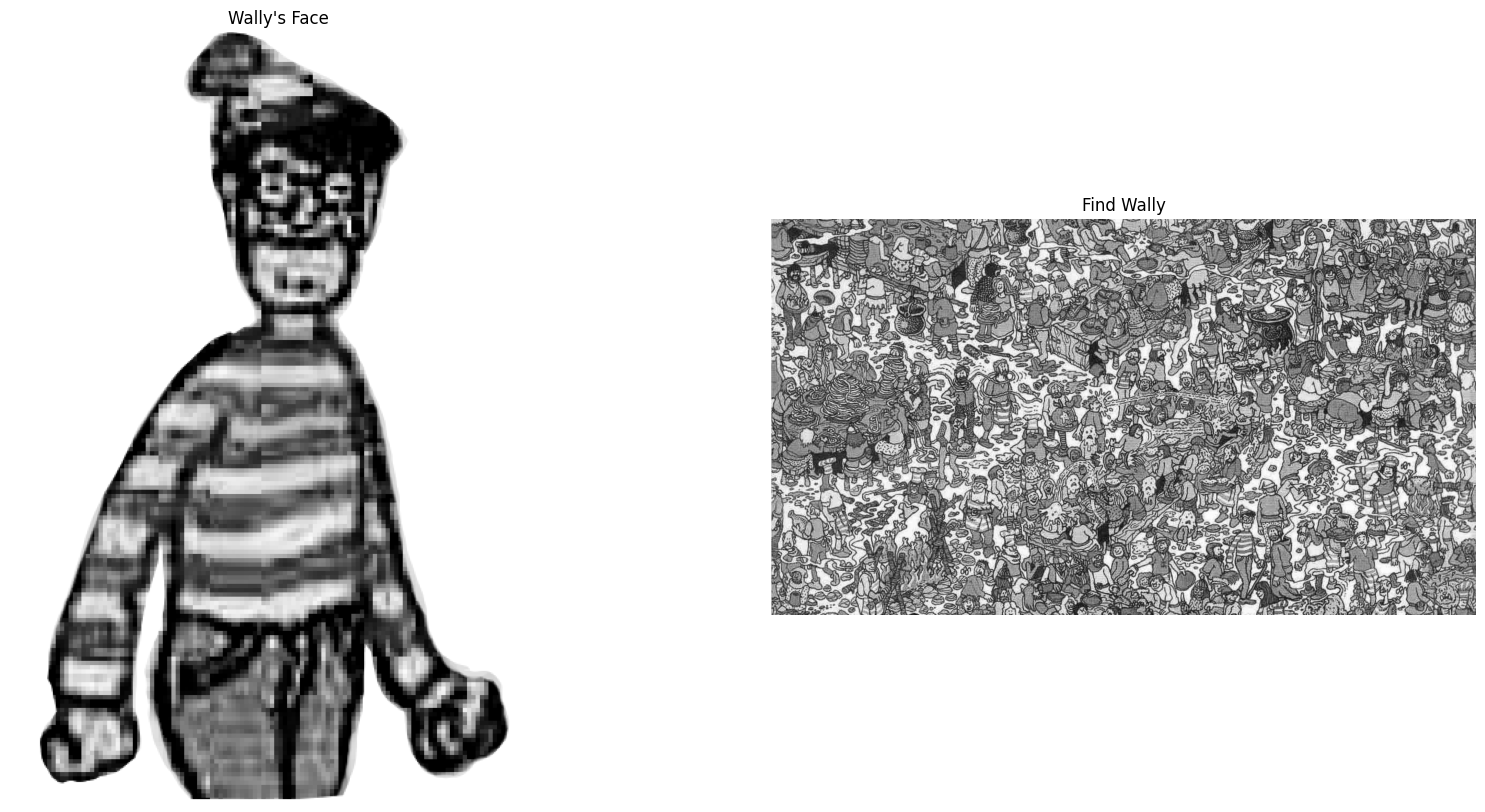

In [16]:
fx, ax = plt.subplots(1, 2, figsize=(20, 10))

ax[0].set_title("Wally's Face")
ax[0].imshow(img_wallys_face_gray, cmap="gray")
ax[0].axis("off")

ax[1].set_title("Find Wally")
ax[1].imshow(img_find_wally_gray, cmap="gray")
ax[1].axis("off")
plt.show()

### 2. Detect keypoints and create descriptor

During the class we mentioned SIFT, however you can use any algorithm for detection and description.

Steps:

1. Find keypoints from the 2 grayscale images
2. Store their descriptors


In [ ]:
# --- YOUR CODE HERE, TO PREPARE DETECT THE KEYPOINTS, AND RESPECTIVE DESCRIPTORS ---

Draw keypoints in pattern's image - Wally's image.


In [ ]:
# Wally's face
keypoints_with_size = np.copy(img_wallys_face_rgb)

cv2.drawKeypoints(
    img_wallys_face_gray,
    pattern_keypoints,
    keypoints_with_size,
    flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS,
)

# Find Wally board
keypoints_with_size_find_wally = np.copy(img_find_wally_rgb)

cv2.drawKeypoints(
    img_find_wally_gray,
    to_find_keypoints,
    keypoints_with_size_find_wally,
    flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS,
)

# Print
fx, ax = plt.subplots(1, 2, figsize=(20, 10))
ax[0].set_title("Pattern keypoints With Size")
ax[0].imshow(keypoints_with_size, cmap="gray")
ax[0].axis("off")

ax[1].set_title("Find Wally keypoints With Size")
ax[1].imshow(keypoints_with_size_find_wally, cmap="gray")
ax[1].axis("off")
plt.show()

# Print the number of keypoints detected in the wally image
print("Number of Keypoints Detected In Wally's Image: ", len(pattern_keypoints))

### 3. Match the descriptors between the 2 images - find correspondence


In [ ]:
# --- YOUR CODE HERE, TO PREPARE MATCH THE DESCRIPTORS BETWEEN THE 2 IMAGES ---

Print the matches


In [ ]:
result = cv2.drawMatches(
    img_wallys_face_rgb,
    pattern_keypoints,
    img_find_wally_rgb,
    to_find_keypoints,
    matches,
    img_find_wally_gray,
    flags=2,
)

# Display the best matching points
plt.rcParams["figure.figsize"] = [14.0, 7.0]
plt.title("Best Matching Points")
plt.imshow(result)
plt.axis("off")
plt.show()

# Print total number of matching points between Wally and the puzzle board
print(
    "\nNumber of Matching Keypoints Between The Training and Query Images: ",
    len(matches),
)

We can see that a lot of matches are incorrect. So we need a way to remove the outliers.


### 4. Remove the incorrect matches / outliers


In [ ]:
# --- YOUR CODE HERE, REMOVE THE INCORRECT MATCHES / OUTLIERS ---

See the result:


In [ ]:
img_wally_found = cv2.drawMatches(
    img_wallys_face_rgb,
    inlier_keypoints_left,
    img_find_wally_rgb,
    inlier_keypoints_right,
    placeholder_matches,
    None,
)

# Display the best matching points
plt.rcParams["figure.figsize"] = [14.0, 7.0]
plt.title("After RANSAC")
plt.imshow(img_wally_found)
plt.axis("off")
plt.show()